In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
def get_data(nx,nn,data,del_outliers=True):
    X = {}
    for item in data:
        param = item[0]
        #if len(param.split(','))==1:
        #    param = 'ANNchor: %s' % param
        #else:
        #    param = 'pynn: %s' % param

        time = float(item[1])
        acc = int(item[2])
        try:
            X[param]['t'].append(time)
            X[param]['acc'].append(acc)
            X[param]['err'].append((nn*nx-acc)/(nx*nn))

        except:
            X[param] = {'t':[time],'acc':[acc],'err':[(nn*nx-acc)/(nx*nn)]}
    for param in X.keys():
        for l in X[param].keys():
            X[param][l] = np.array(X[param][l])

        if del_outliers:
            ix = np.argsort(X[param]['t'])
            n = len(ix)
            ix = ix[int(0.05*n):int(0.95*n)]
            for l in X[param].keys():
                X[param][l] = X[param][l][ix]
    return X

In [3]:
(9/7)/1.2857

1.0000111112345693

In [4]:
7.5*1.2857

9.642750000000001

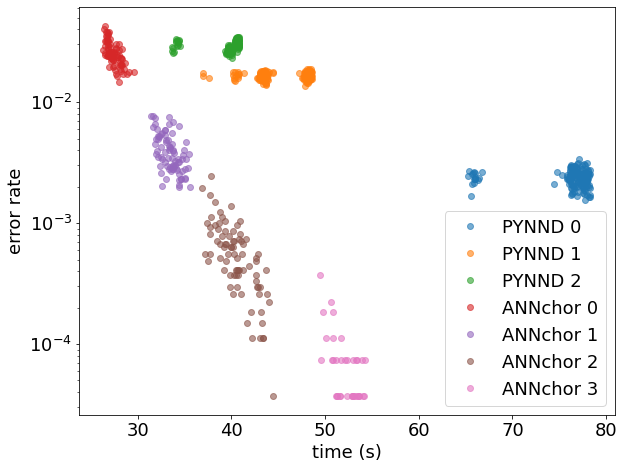

In [5]:
with open('bench_wasserstein.txt','r') as f:
    data=f.read()
data = [x.split('|') for x in data.split('\n')]
X=get_data(1797,15,data,del_outliers=True)
fig,ax = plt.subplots(figsize=(9.6,7.5))



for i,param in enumerate(X):
    if i<3:
        label = 'PYNND %d' % (i%3)
    else:
        label = 'ANNchor %d' % ((i-3)%4)


    ax.plot(X[param]['t'],X[param]['err']+3.7e-5,'o',alpha=0.6,label=label)


ax.set_xlabel('time (s)')
ax.set_ylabel('error rate')

#

#


ax.legend()
#ax.hlines(3.7e-5,25,60,'r',alpha=0.5)
#ax.hlines(0.003746,25,80,'r',alpha=0.5)
#ax.hlines(0.03746,25,80,'r',alpha=0.5)


#ax.hlines(60/(15*1797),30,80,'r',alpha=0.5)






ax.set_yscale('log')

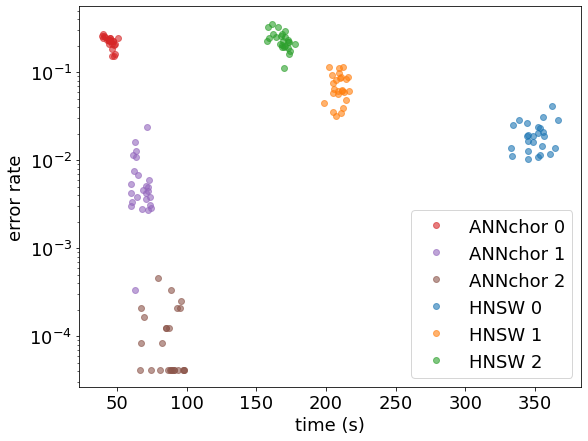

In [30]:
with open('pynn2.txt','r') as f:
    data=f.read()
data = [x.split('|') for x in data.split('\n')]
X=get_data(1600,15,data,del_outliers=True)
fig,ax = plt.subplots(figsize=(9,7))


for i,param in enumerate(X):
    if i<4:
        label = 'ANNchor %d' % (i%4)
    else:
        label = 'HNSW %d' % ((i-5)%4)

    if i==3:
        continue
    if i==4:
        continue

    if i<4:
        c=i+3
    else:
        c=i-5
    ax.plot(X[param]['t']+i,X[param]['err']+1/(15*1600),'o',alpha=0.6,label=label,color =plt.cm.tab10.colors[c])


ax.set_xlabel('time (s)')
ax.set_ylabel('error rate')

#

#


ax.legend()
#ax.hlines(3.7e-5,25,60,'r',alpha=0.5)
#ax.hlines(0.003746,25,80,'r',alpha=0.5)
#ax.hlines(0.03746,25,80,'r',alpha=0.5)


#ax.hlines(60/(15*1797),30,80,'r',alpha=0.5)






ax.set_yscale('log')


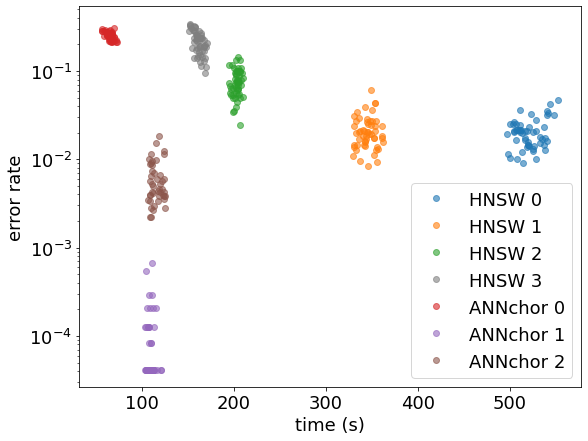

In [6]:
with open('bench_edit-Copy1.txt','r') as f:
    data=f.read()
data = [x.split('|') for x in data.split('\n')]
X=get_data(1600,15,data,del_outliers=True)
fig,ax = plt.subplots(figsize=(9,7))
colors = [plt.cm.tab10.colors[i] for i in [0,1,2,7,3,3,4,4,5,5]]
j=-1
for i,param in enumerate(X):

    if param.split("'")[1]=='annchor':
        continue
    j+=1
    name = 'HNSW'
    label = name+' %d' % j
    ax.plot(X[param]['t'],X[param]['err']+1/(15*1600),'o',alpha=0.6,label=label,color=colors[j])
j=3
for i,param in enumerate(X):

    if param.split("'")[1]=='annchor':
        name = 'ANNchor'
    else:
        continue
    j+=1
    if j%2!=0:
        continue
    label = name+' %d' % (j//2-2)
    ax.plot(X[param]['t'],X[param]['err']+1/(15*1600),'o',alpha=0.6,label=label,color=colors[j])

ax.legend()
#x = np.linspace(0,520,1000)
#y = np.hstack( [[1]*180, 1/(x[180:]-90)])
#ax.plot(x,y)
#ax.fill_between(x,y,0*y,alpha=0.3)

#ax.fill_between(x,y,x*0+1,alpha=0.3)
ax.set_xlabel('time (s)')
ax.set_ylabel('error rate')


ax.set_yscale('log')

#ax.hlines(500/(15*1797),50,500,'r',alpha=0.5)
#ax.hlines(5/(15*1797),50,500,'r',alpha=0.5)
#ax.hlines(5000/(15*1797),50,500,'r',alpha=0.5)




In [99]:
with open('scaling.txt','r') as f:
    data = [line.strip().split('|') for line in f]

In [100]:
D = {}

for item in data:
    label = item[0]
    nx = int(item[1])
    err = int(item[2])
    evals = int(item[3])
    frac = evals/(nx*(nx-1)/2)
    try:
        D[label].append((nx,evals))
    except:
        D[label] = [((nx,evals))]
for label in D:
    D[label]=np.array(D[label])
    
    

pynn
anchor_10
1.027183581064736
1.0737163288596103


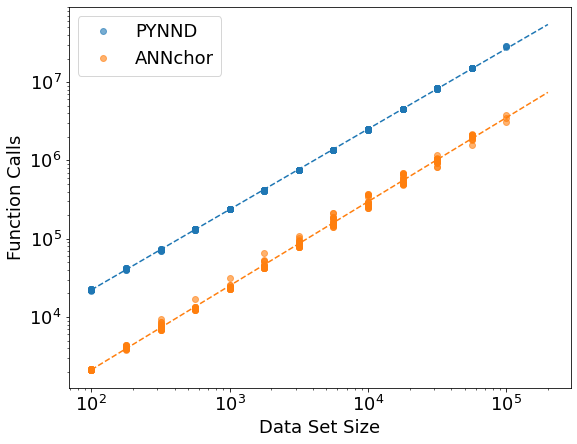

In [103]:
fig,ax = plt.subplots(figsize=(9,7))
c = plt.cm.tab10.colors
for i,label in enumerate(D):
    if '/' in label:
        continue
    if '5' in label:
        continue
    if 'anchor' in label:
        name = 'ANNchor'
    else:
        name = 'PYNND'
    print(label)
    ax.plot(*(D[label]*[1,1]).T,'o',color=c[i],alpha=0.6,label=name)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
lr = {}
for i,label in enumerate(D):
    if '/' in label:
        continue
    if '5' in label:
        continue
    LR.fit(np.log10(D[label][:,0].reshape(-1, 1)),np.log10(D[label][:,1]))

    x = np.linspace(2,5.3,10)
    y = LR.coef_[0]*x + LR.intercept_
    print(LR.coef_[0])
    ax.plot(10**x,10**y,'--',color=c[i])
    
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Data Set Size')
ax.set_ylabel('Function Calls')
ax.legend()
plt.show()

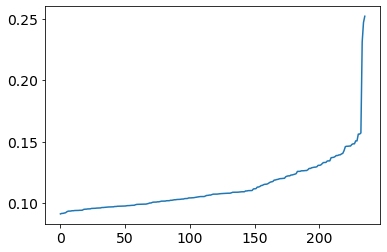

In [81]:
fig,ax = plt.subplots()
ax.plot( np.sort((D['anchor_10']*[1,1])[:,1]/(D['pynn']*[1,1])[:236,1]))
plt.show()

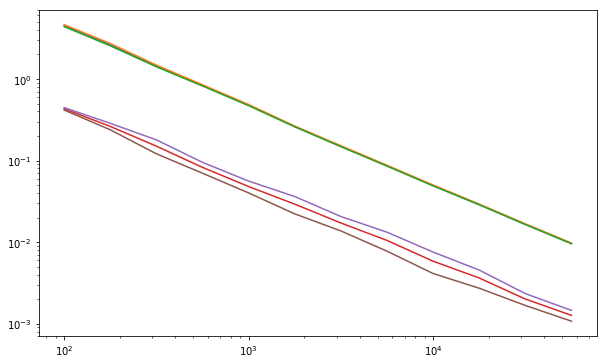

In [17]:
labels = ['pynn','anchor_10']
fig,ax = plt.subplots(figsize=(10,6))

for label in labels:
    ax.plot(*np.array([(n,np.mean(D[label][D[label][:,0]==n][:,1])) for n in unn]).T,'-')
    ax.plot(*np.array([(n,(np.mean(D[label][D[label][:,0]==n][:,1])+
                          2*np.std(D[label][D[label][:,0]==n][:,1]))) for n in unn]).T,'-')
    ax.plot(*np.array([(n,(np.mean(D[label][D[label][:,0]==n][:,1])-
                          2*np.std(D[label][D[label][:,0]==n][:,1]))) for n in unn]).T,'-')

ax.set_yscale('log')
ax.set_xscale('log')

In [10]:
[(n,(np.mean(D['anchor_10'][D['anchor_10'][:,0]==n][:,1]) +
     np.std(D['anchor_10'][D['anchor_10'][:,0]==n][:,1]))) for n in unn]

[(100.0, 0.43828034081778217),
 (177.0, 0.27515109994833353),
 (316.0, 0.16486294636419196),
 (562.0, 0.08884658006604913),
 (1000.0, 0.05203953313932053),
 (1778.0, 0.03274513839103399),
 (3162.0, 0.018891276027032552),
 (5623.0, 0.011875378198495275),
 (10000.0, 0.006701510426139366),
 (17782.0, 0.004093134580107156),
 (31622.0, 0.00217396178023549),
 (56234.0, 0.0013622111654572485)]

In [11]:
E = {}

for item in data:
    label = item[0]
    nx = int(item[1])
    err = int(item[2])
    evals = int(item[3])
    frac = evals/(nx*(nx-1)/2)
    try:
        E[label].append((nx,err))
    except:
        E[label] = [(nx,err)]
for label in D:
    E[label]=np.array(E[label])
    
    

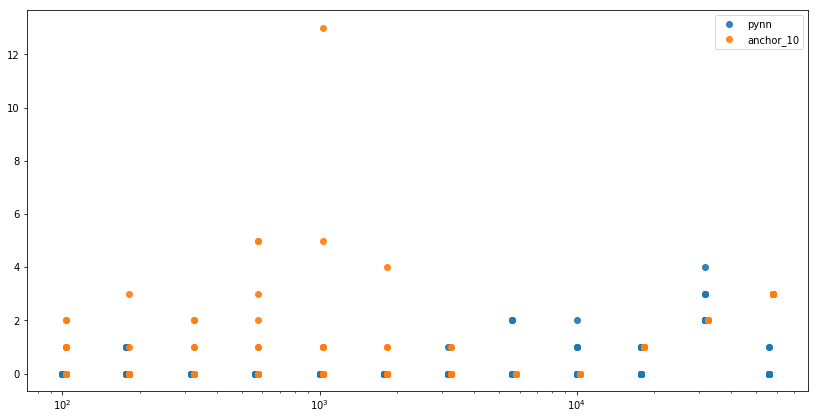

In [12]:
fig,ax = plt.subplots(figsize=(14,7))
c = plt.cm.tab10.colors
for i,label in enumerate(D):
    if '/' in label:
        continue
    ax.plot(*(E[label]*[1+0.03*i,1]).T,'o',color=c[i],alpha=0.9,label=label)


ax.set_xscale('log')
#ax.set_yscale('log')
ax.legend()



In [13]:
f = lambda nx:10
f(1)

10

In [14]:
D[label]

array([[1.00000000e+02, 4.25656566e-01],
       [1.00000000e+02, 4.28080808e-01],
       [1.00000000e+02, 4.27070707e-01],
       [1.00000000e+02, 4.34141414e-01],
       [1.00000000e+02, 4.35959596e-01],
       [1.77000000e+02, 2.69131998e-01],
       [1.77000000e+02, 2.58602979e-01],
       [1.77000000e+02, 2.84155110e-01],
       [1.77000000e+02, 2.67526965e-01],
       [1.77000000e+02, 2.71956857e-01],
       [3.16000000e+02, 1.73759293e-01],
       [3.16000000e+02, 1.38115331e-01],
       [3.16000000e+02, 1.58047016e-01],
       [3.16000000e+02, 1.38677918e-01],
       [3.16000000e+02, 1.39381153e-01],
       [5.62000000e+02, 8.59167349e-02],
       [5.62000000e+02, 8.10322188e-02],
       [5.62000000e+02, 8.15650751e-02],
       [5.62000000e+02, 7.84313725e-02],
       [5.62000000e+02, 8.04676448e-02],
       [1.00000000e+03, 4.61241241e-02],
       [1.00000000e+03, 4.70710711e-02],
       [1.00000000e+03, 4.51011011e-02],
       [1.00000000e+03, 5.18038038e-02],
       [1.000000

In [31]:
ev = n**LR.coef_[0]+ LR.intercept_

NameError: name 'n' is not defined

In [ ]:
n**-1 = evals/ nx**2

In [34]:
np.round(np.random.random(size=3),3)

array([0.671, 0.027, 0.385])